# Part 1 - Exploratory Data Analysis

Problem 1: 

In [299]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from imblearn.over_sampling import SMOTE

In [251]:
df = pd.read_csv("robots_movement.csv")
df1 = pd.read_csv("robots_surface.csv")

In [252]:
df.shape

(462080, 11)

In [253]:
df1.shape

(3610, 3)

Problem 2: 

In [254]:
df.head()

,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
0,0,0,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532,-2.198206,-0.024668,1.396664
1,0,1,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128,-2.198203,-0.024662,1.396646
2,0,2,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267,-2.198178,-0.024728,1.396682
3,0,3,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960,-2.198146,-0.024770,1.396721
4,0,4,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410,-2.198135,-0.024784,1.396693


In [255]:
df.corr()

,series_id,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
series_id,1.000000e+00,-8.734501e-15,-0.001615,-0.016431,0.025301,-0.001471,-0.009625,-0.002085,0.227099,0.163510,-0.124005
measurement_number,-8.734501e-15,1.000000e+00,0.000027,0.000928,0.000734,-0.001261,-0.002878,-0.001120,0.000082,0.000849,0.001079
angular_velocity_X,-1.615322e-03,2.747425e-05,1.000000,-0.086944,-0.016229,-0.002689,-0.019163,-0.034380,0.000211,0.003324,0.001793
angular_velocity_Y,-1.643120e-02,9.282848e-04,-0.086944,1.000000,-0.761548,-0.027420,0.015876,0.004486,0.012836,0.072765,0.048793
angular_velocity_Z,2.530089e-02,7.344228e-04,-0.016229,-0.761548,1.000000,0.028835,-0.000265,-0.001156,-0.015318,-0.093674,-0.061721
linear_acceleration_X,-1.470736e-03,-1.261212e-03,-0.002689,-0.027420,0.028835,1.000000,0.058408,0.018986,-0.003630,-0.125987,-0.003926
linear_acceleration_Y,-9.625287e-03,-2.878139e-03,-0.019163,0.015876,-0.000265,0.058408,1.000000,0.377997,0.010333,0.010435,0.001984
linear_acceleration_Z,-2.084959e-03,-1.119746e-03,-0.034380,0.004486,-0.001156,0.018986,0.377997,1.000000,0.002116,0.001203,0.000268
direction_X,2.270992e-01,8.157034e-05,0.000211,0.012836,-0.015318,-0.003630,0.010333,0.002116,1.000000,0.143814,-0.019280
direction_Y,1.635098e-01,8.485409e-04,0.003324,0.072765,-0.093674,-0.125987,0.010435,0.001203,0.143814,1.000000,-0.097700


C:\Users\ameen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='surface', ylabel='count'>

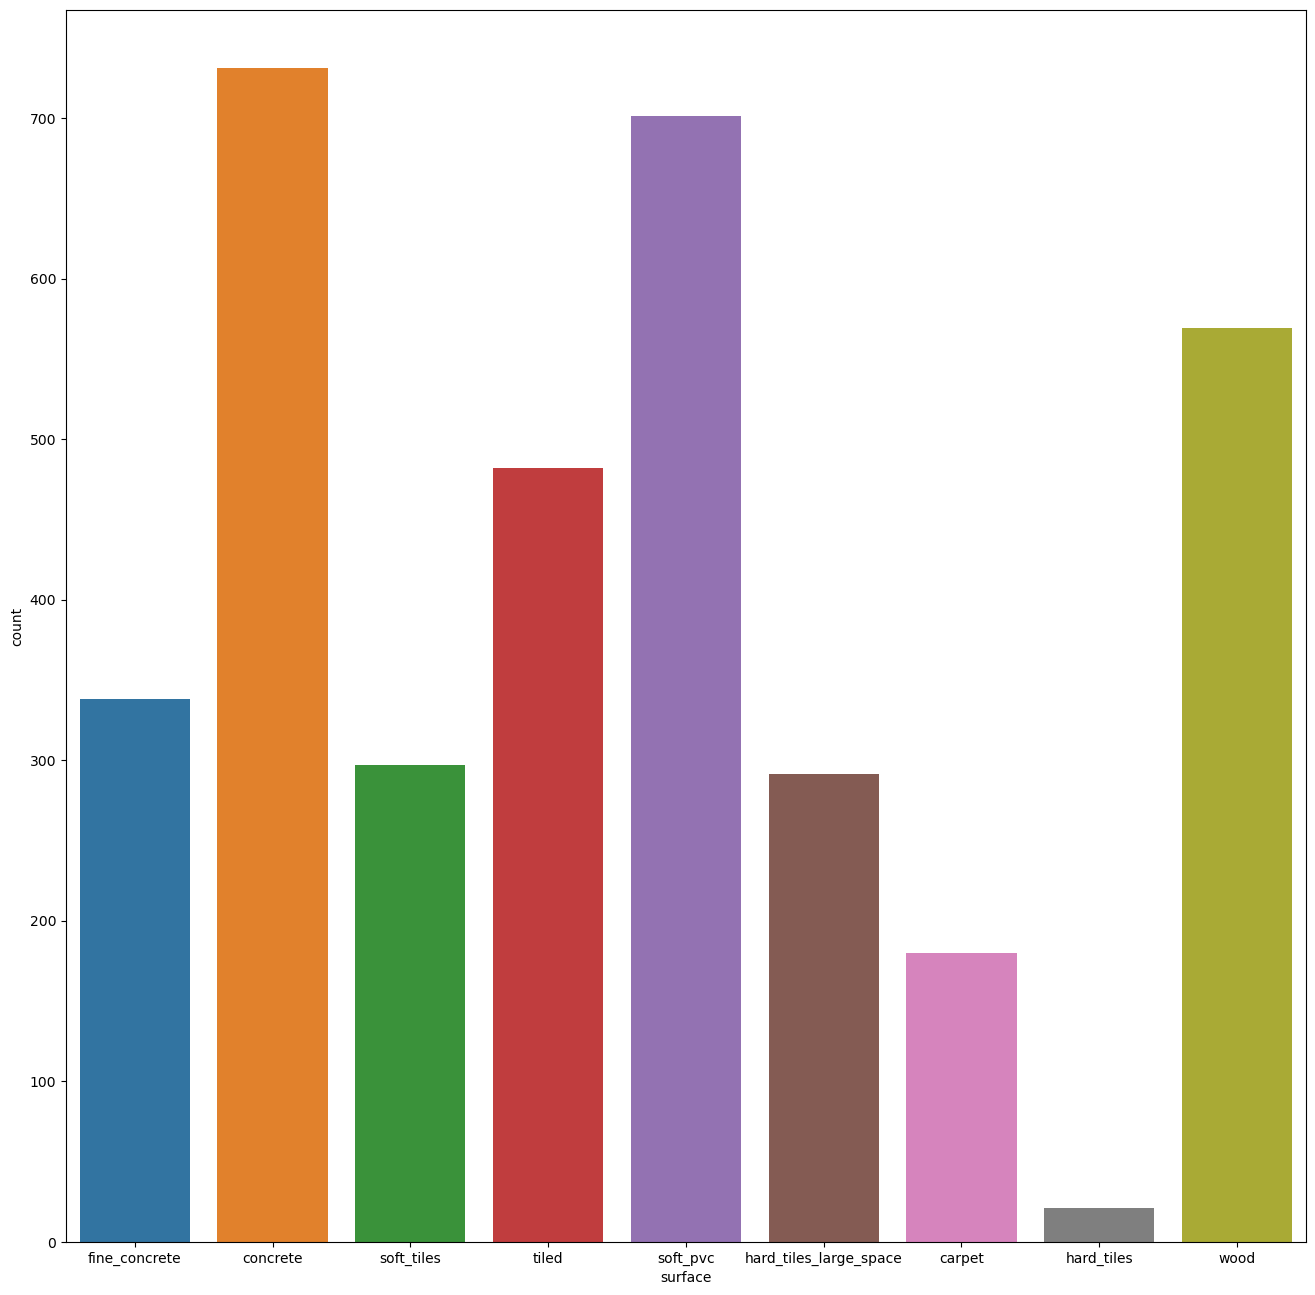

In [256]:
plt.figure(figsize=(16,16))
sns.countplot(df1["surface"])

There are 9 types of surfaces that are shown to be fine concrete, concrete, soft tiles, tiled, soft pvc surface, hard tiles large space, carpet, hard tiles and wood. 

The distribution of the different surface types are unbalanced. There are three sufrace types with over a 550 count, there are three with over a 250 count and less than 500, one almost at a 200 count and the last surface type being under a 100 count.

This data exemplifies more of an assymetrical distribution. 

Problem 3: 

<AxesSubplot:>

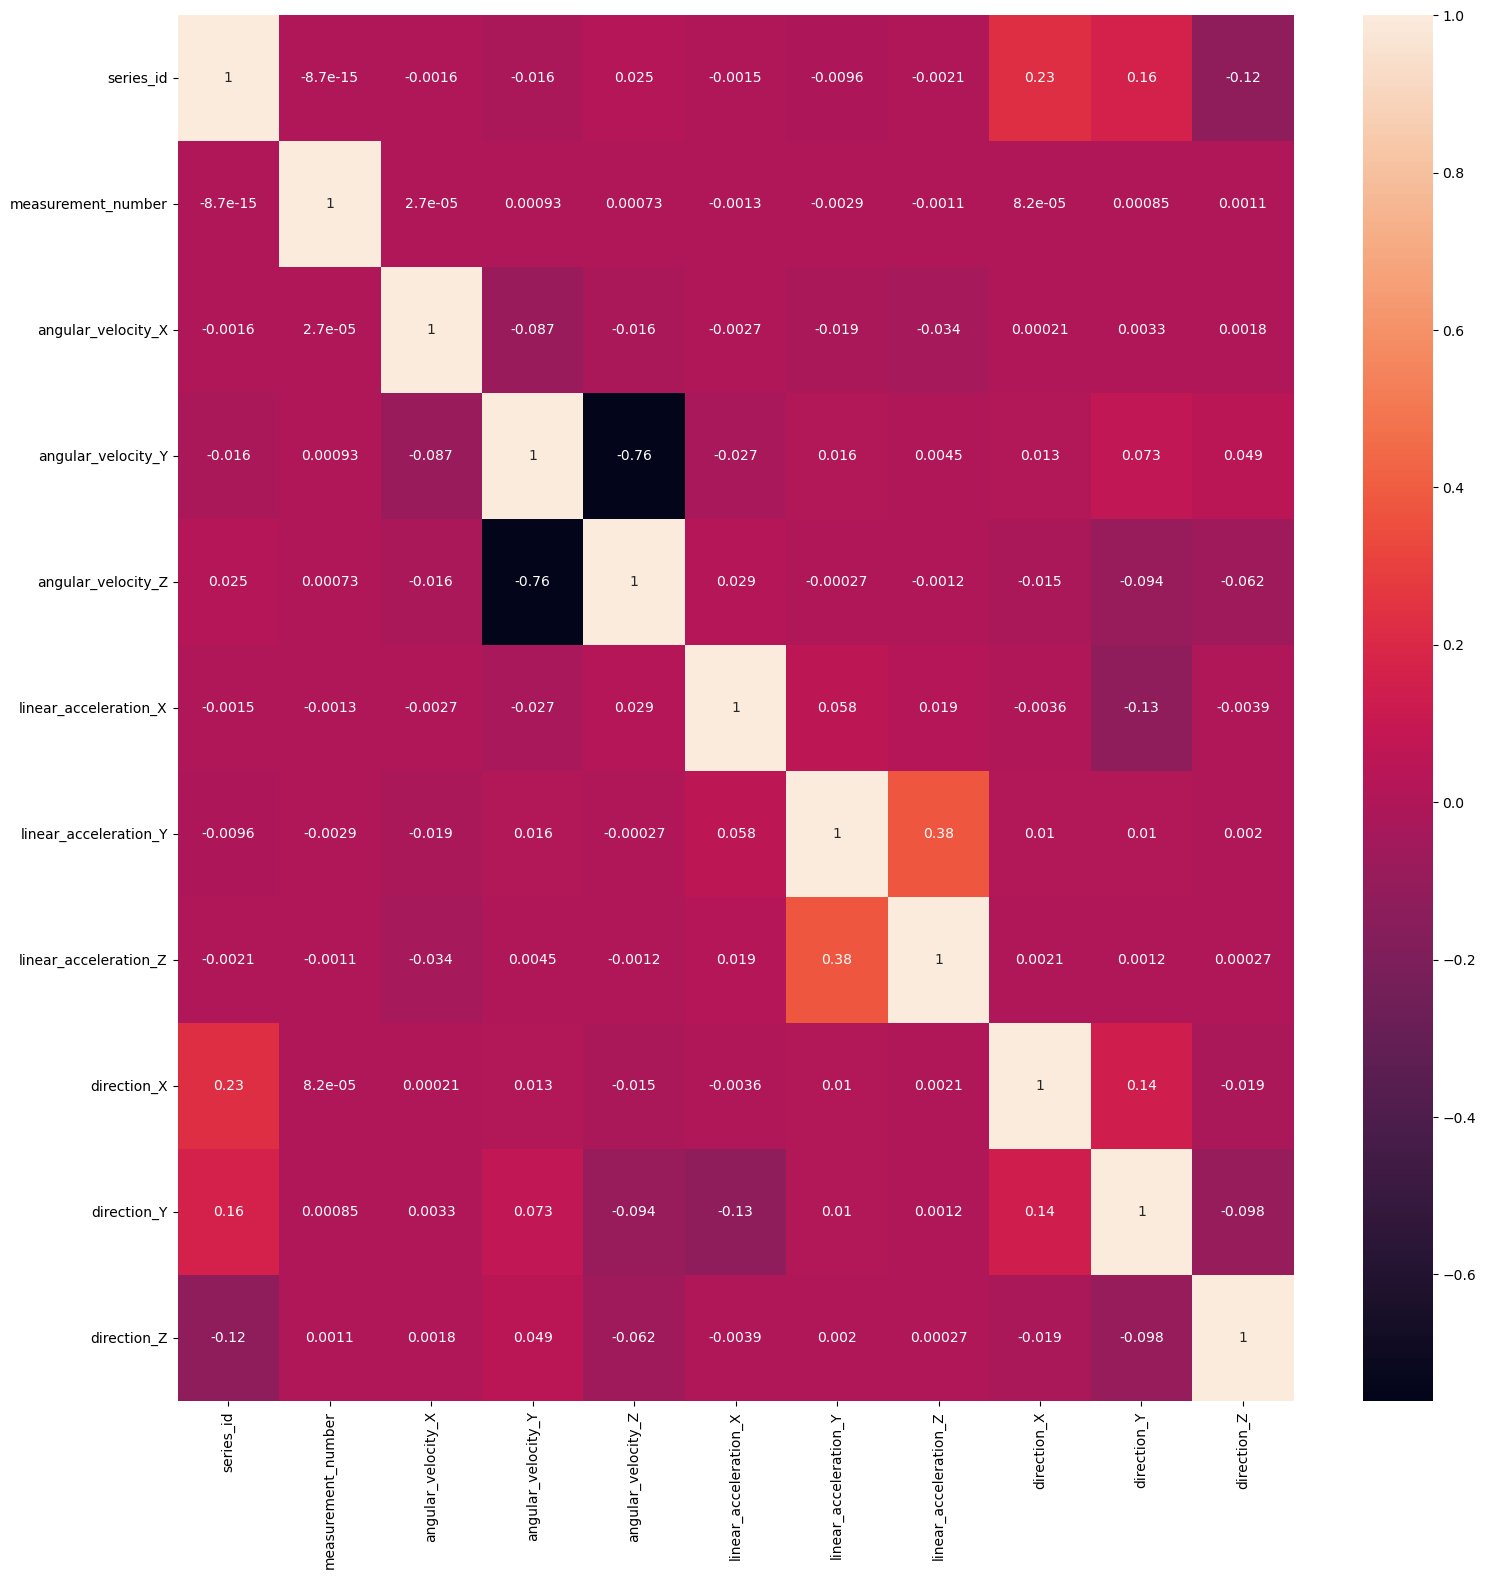

In [257]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot = True)

There is one strong correlation of 0.76 between the angular velocity z and the angular velocity y. That seems to be the highest correlation compared to the other input features. The second highest would be the correlation between linear acceleration z and linear acceleration y which is 0.38.

Problem 4:

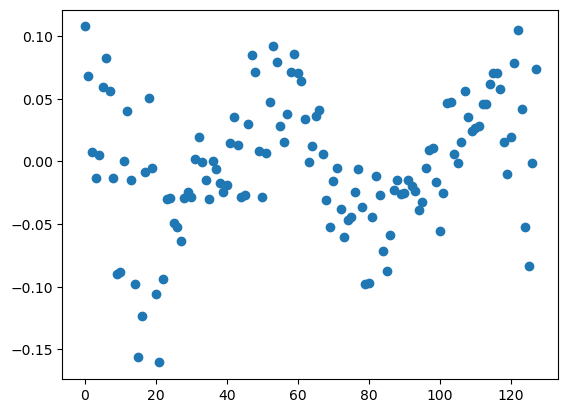

In [258]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["angular_velocity_X"]
plt.scatter(x,y)

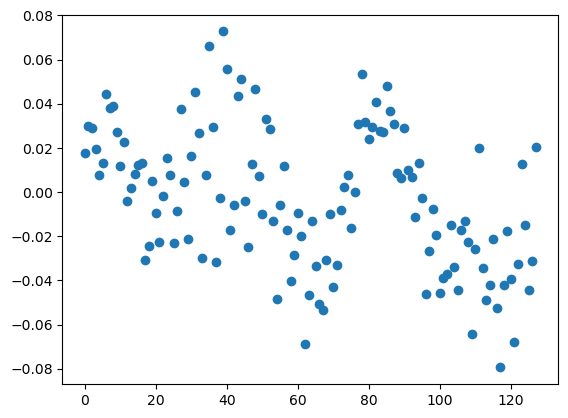

In [259]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["angular_velocity_Y"]
plt.scatter(x,y)

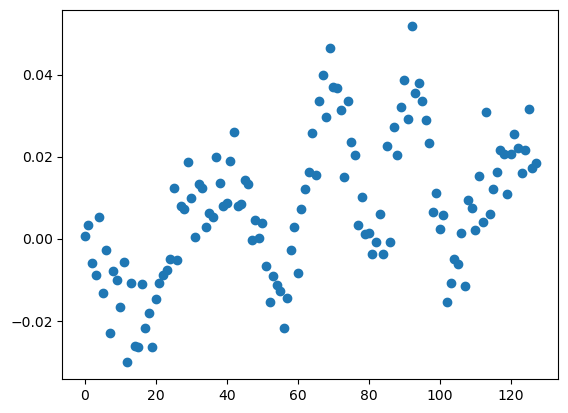

In [260]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["angular_velocity_Z"]
plt.scatter(x,y)

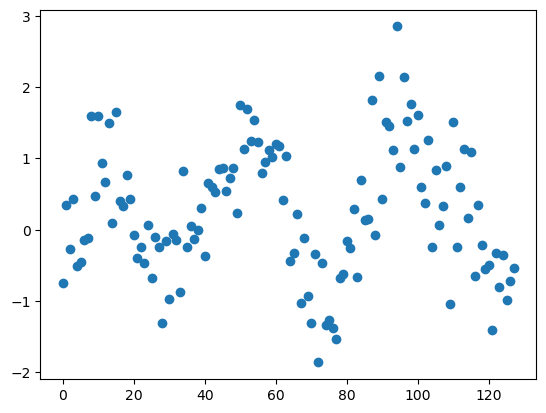

In [261]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["linear_acceleration_X"]
plt.scatter(x,y)

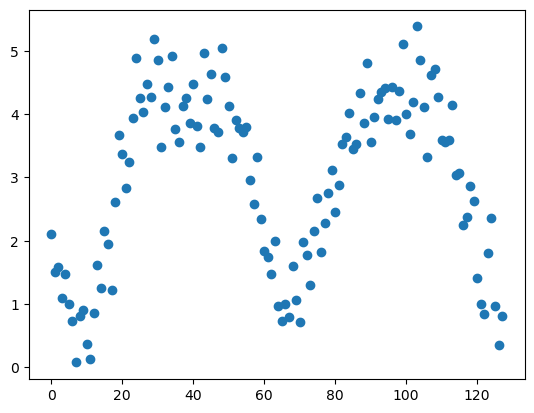

In [262]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["linear_acceleration_Y"]
plt.scatter(x,y)

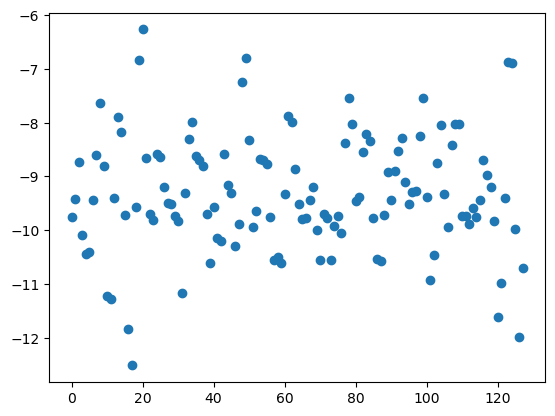

In [263]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["linear_acceleration_Z"]
plt.scatter(x,y)

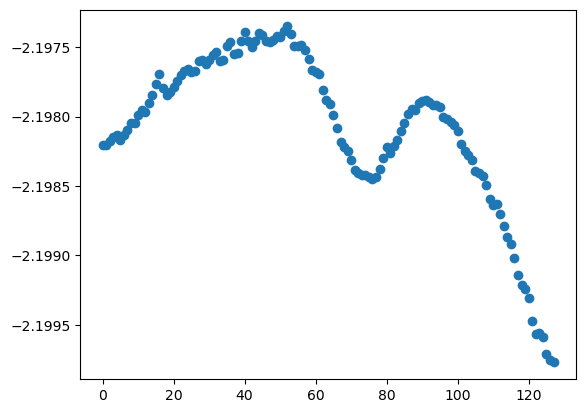

In [264]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["direction_X"]
plt.scatter(x,y)

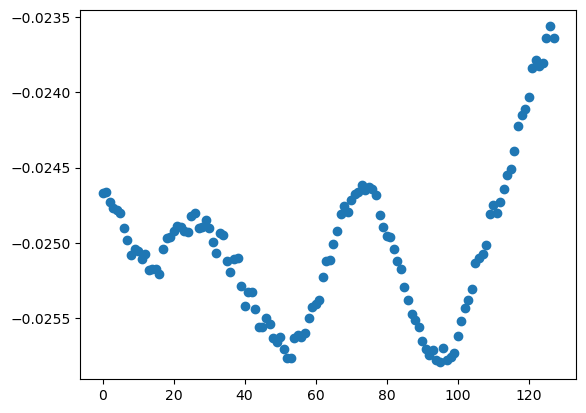

In [265]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["direction_Y"]
plt.scatter(x,y)

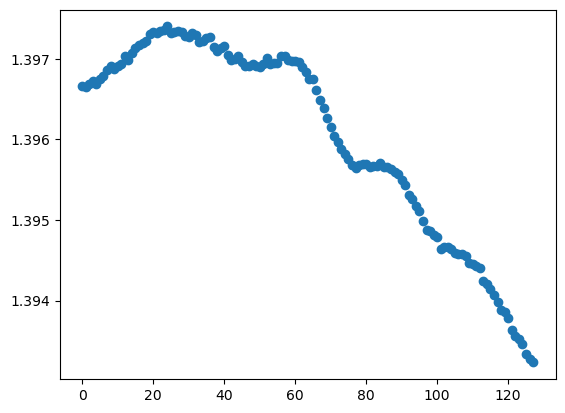

In [266]:
x = df[df["series_id"] < 1]["measurement_number"]
y = df[df["series_id"] < 1]["direction_Z"]
plt.scatter(x,y)

After plotting each of the features, I noticed that the plotted graphs for linear acceleration are sinusiodal waves except the one in the Z direction, which shows to have no pattern. This also applies to the angular velocity plots where they have similar sinusiodal like waves in all directions, even though the X direction one doesn't clearly show it. The directions X,Y, and Z had generic and very good plots that can be clearly seen.

# Part 2 - Feature Engineering I and Baseline Models

Problem 1:

In [267]:
df2 = df.groupby("series_id").mean()

In [268]:
df2.shape

(3610, 10)

In [269]:
df2.head()

,measurement_number,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,direction_X,direction_Y,direction_Z
series_id,,,,,,,,,,
0,63.5,-0.002481,-0.003306,0.007532,0.263418,2.984195,-9.320391,-2.198082,-0.025037,1.396035
1,63.5,0.004605,-0.007757,0.006206,0.121867,2.768193,-9.388899,2.426853,-0.010369,-0.492731
2,63.5,0.002646,-0.009232,0.027989,0.149711,2.886745,-9.395783,-2.041776,-0.012195,2.055021
3,63.5,0.000624,-0.002804,0.007887,0.201791,2.657922,-9.451164,2.351483,-0.015107,-0.635656
4,63.5,0.006969,0.046109,-0.142385,-0.086171,2.981498,-9.349988,2.235396,-0.009793,-0.894147


Problem 2: 

In [270]:
x = df2.drop(["measurement_number"], axis = 1)

I am dropping the measurement number because it doesn't affect the data and all its values are the same.

Problem 3: 

In [271]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df1["surface"] = encoder.fit_transform(df1["surface"])

df = df.apply(LabelEncoder().fit_transform)

In [272]:
y = df1["surface"]

Problem 4:

In [273]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [274]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Lr = LogisticRegression(max_iter = 500)
model_Lr = Lr.fit(x_train_scaled, y_train)

y_pred_Lr = model_Lr.predict(x_test_scaled)

print((lr.score(x_train_scaled,y_train)))

print(metrics.accuracy_score(y_test, y_pred_Lr))
print(metrics.confusion_matrix(y_pred_Lr, y_test))
print(metrics.classification_report(y_pred, y_pred_Lr))

0.32449544914918876
0.3028624192059095
[[  2   0   0   0   1   0   0   0   3]
 [ 26 121  41   0  24  53  54  59  48]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   1   0]
 [  1  47  15  10  48 114  40  48  25]
 [  0   0   6   0   0   0   0   0   0]
 [  4  14  12   0   2  17   0  12  12]
 [ 27  36  27   0  17  19   1  16  79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       111
           1       0.26      0.42      0.32       264
           2       0.00      0.00      0.00       117
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        97
           5       0.21      0.32      0.26       230
           6       0.00      0.00      0.00        79
           7       0.04      0.04      0.04        74
           8       0.08      0.17      0.11       101

    accuracy                           0.19      1083
   macro avg 

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model doesn't perform well and it shows an accuracy of 30%. It also looks like that there were a few surface types with over a precision of 0.2 and the rest were near 0. There seems to be a few misclassifications from the model itself. 

Problem 5:

In [275]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 2)
model_knn = knn.fit(x_train_scaled, y_train)
y_pred_knn = model_knn.predict(x_test_scaled)

print(model_knn.score(x_train_scaled, y_train))

cm = metrics.confusion_matrix(y_test, y_pred_knn)
print(cm)

print(metrics.accuracy_score(y_test, y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn))

0.7843292441630392
[[ 32  18   2   0   1   4   0   1   2]
 [ 27 122  13   1  11  12   7  18   7]
 [  5  12  63   1   5  11   1   0   4]
 [  0   0   1   4   1   3   0   0   1]
 [  3  23   8   1  41  10   4   0   2]
 [  4  28  19   0  11 129   5   3   4]
 [  3   8   6   2   3  13  59   1   0]
 [  7  40   7   1   1  23   6  49   2]
 [ 18  27  14   1  11  19   7  10  60]]
0.5161588180978762
              precision    recall  f1-score   support

           0       0.32      0.53      0.40        60
           1       0.44      0.56      0.49       218
           2       0.47      0.62      0.54       102
           3       0.36      0.40      0.38        10
           4       0.48      0.45      0.46        92
           5       0.58      0.64      0.60       203
           6       0.66      0.62      0.64        95
           7       0.60      0.36      0.45       136
           8       0.73      0.36      0.48       167

    accuracy                           0.52      1083
   macro avg  

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

This model performs better than the logistic regression model with an accuracy score of 51%. A few other averages and scores have increased as well. 

Problem 6a:

In [276]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "metric":["euclidean","manhattan"]
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 10
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.6113855950812472
KNeighborsClassifier(metric='manhattan', n_neighbors=7)
{'metric': 'manhattan', 'n_neighbors': 7}


C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

The best parameters are the mahattan distance metric and 6 neighbors.

This improved the model's accuracy by about 8 percent than the previous model.

GridSearchCV is usually used to acquire the best parameters that will give the most optimal score.

Cross validation is used to estimate the performance of the model and check if there is overfitting in certain sets of data.

Problem 6b:

In [277]:
knn1 = KNeighborsClassifier(metric = "manhattan", n_neighbors = 6)
model_knn1 = knn1.fit(x_train_scaled, y_train)
y_pred_knn1 = model_knn1.predict(x_test_scaled)

print(model_knn1.score(x_train_scaled, y_train))

cm = metrics.confusion_matrix(y_test, y_pred_knn1)
print(cm)

print(metrics.accuracy_score(y_test, y_pred_knn1))
print(metrics.classification_report(y_test, y_pred_knn1))

0.7455480807281362
[[ 22  20   4   0   1   4   2   3   4]
 [  3 144   8   0   7  21   9  11  15]
 [  2  10  61   0   5   9   2   1  12]
 [  0   0   2   3   0   5   0   0   0]
 [  1  17   4   0  41  11  11   0   7]
 [  3  14   8   0   2 153   7   7   9]
 [  2   1   5   2   4  12  63   4   2]
 [  5  28   3   0   1  12   9  71   7]
 [  7  24   8   0   4  18   4  10  92]]
0.6001846722068329
              precision    recall  f1-score   support

           0       0.49      0.37      0.42        60
           1       0.56      0.66      0.61       218
           2       0.59      0.60      0.60       102
           3       0.60      0.30      0.40        10
           4       0.63      0.45      0.52        92
           5       0.62      0.75      0.68       203
           6       0.59      0.66      0.62        95
           7       0.66      0.52      0.58       136
           8       0.62      0.55      0.58       167

    accuracy                           0.60      1083
   macro avg  

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

The model improves with the accuracy increasing to 62.6%. 

Problem 7a and 7b:

In [278]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 800)

rf.fit(x_train_scaled, y_train)

print(rf.score(x_train_scaled, y_train))

y_pred_rf = rf.predict(x_test_scaled)
print(metrics.accuracy_score(y_test, y_pred_rf))

cm = metrics.confusion_matrix(y_test, y_pred_rf)
print(cm)

results = metrics.classification_report(y_test, y_pred_rf)
print(results)

1.0
0.8005540166204986
[[ 40   7   0   0   0   1   1   7   4]
 [  0 177   2   0   0  16   5   6  12]
 [  0   3  85   0   1   1   2   0  10]
 [  0   1   0   2   5   0   0   0   2]
 [  0   9   1   0  66   5   2   1   8]
 [  1   5   2   0   0 183   4   4   4]
 [  1   4   4   0   0   2  80   1   3]
 [  2   8   1   0   0   2   2 115   6]
 [  2  18   6   0   2  12   3   5 119]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        60
           1       0.76      0.81      0.79       218
           2       0.84      0.83      0.84       102
           3       1.00      0.20      0.33        10
           4       0.89      0.72      0.80        92
           5       0.82      0.90      0.86       203
           6       0.81      0.84      0.82        95
           7       0.83      0.85      0.84       136
           8       0.71      0.71      0.71       167

    accuracy                           0.80      1083
   macro avg       0.84      

This model performs the best out of the previous models. The accuracy of the training data is 100% and the accuracy of the test data is 79.9%.

The two most common misclassified surfaces are surfaces 1 and 8 based on the confusion matrix. 

They are usually misclassified as other types of surfaces, this is also seen in the previous models that were done.

# Part 3 - Feature Engineering II and Improving the Models

Problem 1:

In [279]:
new_df = pd.DataFrame()

In [280]:
for col in df.columns:
    new_df[col+'_mean'] = df.groupby(['series_id'])[col].mean()
    new_df[col+'_min'] = df.groupby(['series_id'])[col].min()
    new_df[col+'_max'] = df.groupby(['series_id'])[col].max()
    new_df[col+'_std'] = df.groupby(['series_id'])[col].std()

Problem 2:

In [281]:
new_df.shape

(3610, 44)

There are 3610 observations with the 44 features. 

Problem 3a:

In [282]:
new_df.head()

,series_id_mean,series_id_min,series_id_max,series_id_std,measurement_number_mean,measurement_number_min,measurement_number_max,measurement_number_std,angular_velocity_X_mean,angular_velocity_X_min,...,direction_X_max,direction_X_std,direction_Y_mean,direction_Y_min,direction_Y_max,direction_Y_std,direction_Z_mean,direction_Z_min,direction_Z_max,direction_Z_std
series_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0,0,0.0,63.5,0,127,37.094474,78600.195312,15764,...,66695,209.663928,3499.390625,2189,7553,1124.931503,343576.945312,343131,343807,209.942223
1,1.0,1,1,0.0,63.5,0,127,37.094474,82607.968750,8400,...,418265,302.193672,375635.226562,312009,413996,27537.811726,257037.007812,256792,257354,139.367327
2,2.0,2,2,0.0,63.5,0,127,37.094474,80500.093750,16483,...,120565,706.846306,307061.125000,284781,323777,7116.356267,380902.257812,380373,381503,330.604606
3,3.0,3,3,0.0,63.5,0,127,37.094474,81184.546875,2901,...,409701,223.044551,174415.937500,145333,196972,11462.481007,242467.085938,242130,242665,126.304782
4,4.0,4,4,0.0,63.5,0,127,37.094474,84157.445312,21248,...,388016,2316.526098,394926.500000,383212,407362,6942.963540,220291.000000,215277,226230,3509.198244


The features that need to be removed are the series ids and the measurement number.

Problem 3b:

In [283]:
x = new_df.drop(["series_id_mean","series_id_min","series_id_max","series_id_std","measurement_number_mean","measurement_number_min","measurement_number_max","measurement_number_std"], axis = 1)

In [284]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.3)

scaler = StandardScaler()

x_train_scaled1 = scaler.fit_transform(x_train1)
x_test_scaled1 = scaler.transform(x_test1)

Problem 3c:

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Lr1 = LogisticRegression(max_iter = 500)
model_Lr1 = Lr1.fit(x_train_scaled1, y_train1)

y_pred_Lr1 = model_Lr1.predict(x_test_scaled1)

print((Lr1.score(x_train_scaled1,y_train1)))

print(metrics.accuracy_score(y_test1, y_pred_Lr1))
print(metrics.confusion_matrix(y_pred_Lr1, y_test1))
print(metrics.classification_report(y_pred_Lr1, y_test1))

0.5864661654135338
0.5170821791320406
[[ 17   7   3   0   3   6   1   2   3]
 [ 10 138  12   0  21   7   0  70  36]
 [  0   6  41   0   1  12   0   4   1]
 [  0   0   0   0   0   0   1   0   0]
 [  1   8   6   0  35   2   0  11  12]
 [ 10  18  21   4   9 136  10  14  25]
 [  7   2   1   1   1  14  74   3  10]
 [  0  32  10   0   9   6   0  53  11]
 [  8   9  16   1   3  13   3   6  66]]
              precision    recall  f1-score   support

           0       0.32      0.40      0.36        42
           1       0.63      0.47      0.54       294
           2       0.37      0.63      0.47        65
           3       0.00      0.00      0.00         1
           4       0.43      0.47      0.45        75
           5       0.69      0.55      0.61       247
           6       0.83      0.65      0.73       113
           7       0.33      0.44      0.37       121
           8       0.40      0.53      0.46       125

    accuracy                           0.52      1083
   macro avg  

Problem 3d:

In [286]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "n_neighbors":[1,2,3,4,5,6,7,8,9,10],
    "metric":["euclidean","manhattan"]
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    cv = 10
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_estimator_)
print(gs_results.best_params_)

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

0.6113855950812472
KNeighborsClassifier(metric='manhattan', n_neighbors=7)
{'metric': 'manhattan', 'n_neighbors': 7}


C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [294]:
knn2 = KNeighborsClassifier(metric = "manhattan", n_neighbors = 7)
model_knn2 = knn2.fit(x_train_scaled1, y_train1)
y_pred_knn2 = model_knn2.predict(x_test_scaled1)

print(model_knn2.score(x_train_scaled1, y_train1))

cm = metrics.confusion_matrix(y_test1, y_pred_knn2)
print(cm)

print(metrics.accuracy_score(y_test1, y_pred_knn2))
print(metrics.classification_report(y_test1, y_pred_knn2))

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8654531064503364
[[ 34   8   3   0   0   4   1   0   3]
 [  6 183   4   0   1  10   2   7   7]
 [  1   2  84   0   1   4   3   1  14]
 [  0   0   0   4   0   0   0   0   2]
 [  0   9   4   0  52   4   1   8   4]
 [  0   6   3   0   1 175   5   1   5]
 [  0   1   0   0   0   4  81   3   0]
 [  0  20   4   1   4   2   2 126   4]
 [  3   8   1   0   2   4   5  15 126]]
0.7987072945521699
              precision    recall  f1-score   support

           0       0.77      0.64      0.70        53
           1       0.77      0.83      0.80       220
           2       0.82      0.76      0.79       110
           3       0.80      0.67      0.73         6
           4       0.85      0.63      0.73        82
           5       0.85      0.89      0.87       196
           6       0.81      0.91      0.86        89
           7       0.78      0.77      0.78       163
           8       0.76      0.77      0.77       164

    accuracy                           0.80      1083
   macro avg  

C:\Users\ameen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [296]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 800)

rf.fit(x_train_scaled1, y_train1)

print(rf.score(x_train_scaled1, y_train1))

y_pred_rf1 = rf.predict(x_test_scaled1)
print(metrics.accuracy_score(y_test1, y_pred_rf1))

cm = metrics.confusion_matrix(y_test1, y_pred_rf1)
print(cm)

results = metrics.classification_report(y_test1, y_pred_rf1)
print(results)

1.0
0.8568790397045245
[[ 43   6   0   0   0   2   1   0   1]
 [  3 195   0   0   0  11   2   1   8]
 [  0   5  86   0   0   6   3   2   8]
 [  0   0   0   1   0   2   0   0   3]
 [  0   6   2   0  65   2   1   3   3]
 [  0   5   1   0   1 180   4   1   4]
 [  0   2   0   0   1   6  78   0   2]
 [  4   7   1   0   2   1   3 142   3]
 [  0   9   1   0   4   3   4   5 138]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.83        53
           1       0.83      0.89      0.86       220
           2       0.95      0.78      0.86       110
           3       1.00      0.17      0.29         6
           4       0.89      0.79      0.84        82
           5       0.85      0.92      0.88       196
           6       0.81      0.88      0.84        89
           7       0.92      0.87      0.90       163
           8       0.81      0.84      0.83       164

    accuracy                           0.86      1083
   macro avg       0.88      

The logistic regression model was the least accurate of the models with an accuracy of 48%, comparing it to the previous part, it had increased from 30%. 

The second best model was the K neighbors model with 7 neighbors. It had an accuracy of 79.8%, comparing it to the previous part, it had increased from 51%. 

The best model was the random forest classifier with an accuracy of 85.6%, comparing it to the previous part, it had increased from 80%. 

# Part 4 - Testing Your Model

Problem 4a, 4b:

In [300]:
sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x, y)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x_bal, y_bal, test_size = 0.3)

scaler = StandardScaler()

x_train_scaled2 = scaler.fit_transform(x_train2)
x_test_scaled2 = scaler.transform(x_test2)

rf = RandomForestClassifier(n_estimators = 800)

rf.fit(x_train_scaled2, y_train2)

print(rf.score(x_train_scaled2, y_train2))

y_pred_rf2 = rf.predict(x_test_scaled2)
print(metrics.accuracy_score(y_test2, y_pred_rf2))

cm = metrics.confusion_matrix(y_test2, y_pred_rf2)
print(cm)

results = metrics.classification_report(y_test2, y_pred_rf2)
print(results)

1.0
0.9432624113475178
[[224   3   0   0   0   1   0   0   1]
 [  7 185   3   0   6   6   1   8   5]
 [  0   6 208   0   1   1   1   0   3]
 [  0   0   0 194   0   0   0   0   0]
 [  0   2   3   0 199   0   0   1   1]
 [  1   4   1   0   1 202   3   4   5]
 [  0   2   0   1   0   0 233   1   0]
 [  3   3   2   0   0   3   1 201   1]
 [  0   2   2   0   1   6   1   4 216]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       229
           1       0.89      0.84      0.86       221
           2       0.95      0.95      0.95       220
           3       0.99      1.00      1.00       194
           4       0.96      0.97      0.96       206
           5       0.92      0.91      0.92       221
           6       0.97      0.98      0.98       237
           7       0.92      0.94      0.93       214
           8       0.93      0.93      0.93       232

    accuracy                           0.94      1974
   macro avg       0.94      

I chose the random forest model firstly because it was most accurate model in this lab compared to the others. I also used the Smote Command balance the class distributions we had since we did have misclassifications in the previous models for certain surface types. This would allow the surface types to be classified equally with a better accuracy. This model provided an accuracy of 94.3% which is the highest compared to the other models that were done in this lab. It also shows a pretty great representation of it within the confusion matrix that is produced above. 